In [1]:
# Técnicas para dados desbalanceados

# Objetivo: Comparação entre o desempenho dos modelos.
#           Utilização da métrica 'recall'

# SMOTE.
# UnderSampling Inteligente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('Dados/3/creditcard.csv')

df['Time_Hour'] = ((df['Time'] % 86400) / 3600).astype(int)

(df.groupby('Class').count())['Time'] # 284315 de classe 0 e 492 de classe 1

Class
0    284315
1       492
Name: Time, dtype: int64

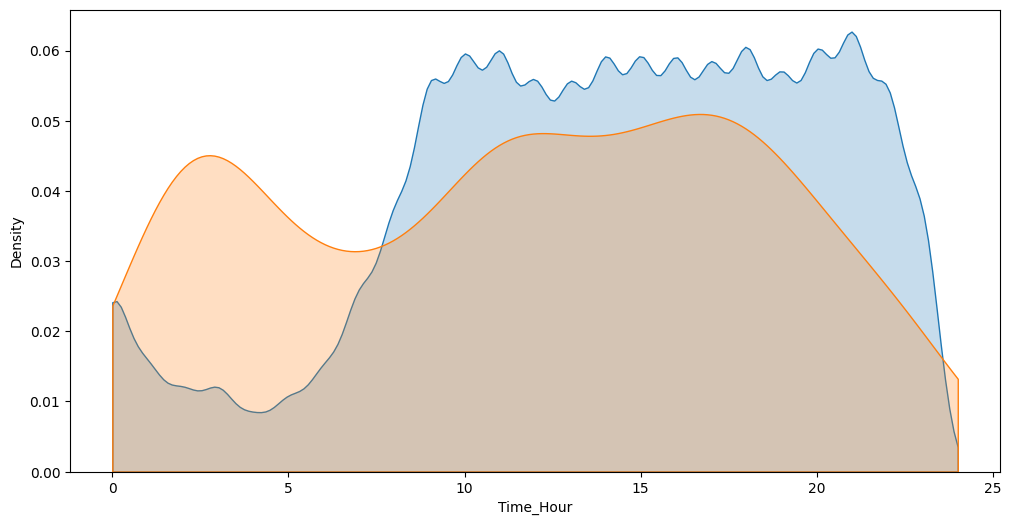

In [3]:
# Visualização da distribuição dos dados nas horas do dia.

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df[df['Class'] == 0], x = 'Time_Hour', bw_adjust = 1, label = 'Normal', fill = True, clip = (0,24))
sns.kdeplot(data = df[df['Class'] == 1], x = 'Time_Hour', bw_adjust = 1, label = 'Fraude', fill = True, clip = (0,24))

plt.savefig(fname='kde_creditcard.png')

plt.show()

In [70]:
target = 'Class'

y = df[target] # Classificação
X = df.drop(columns=[target, 'Time']) # Samples
X, y

(               V1         V2        V3        V4        V5        V6  \
 0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
 2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...           ...        ...       ...       ...       ...       ...   
 284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
 284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
 284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
 284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
 284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   
 
               V7        V8        V9       V10  ...       V21       V22  \
 0       0.239599  0.098698  0.363787  0.09079

In [79]:
# Aprendizado sem utilizar métodos para lidar com o desbalanceamento de classe.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

RFC_raw = RandomForestClassifier(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

RFC_raw.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [82]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score


y_pred_raw = RFC_raw.predict(X_test)
recall_raw = recall_score(y_test, y_pred_raw)
cm_raw = confusion_matrix(y_test, y_pred_raw)
f1_raw = f1_score(y_test, y_pred_raw)
pre_raw = precision_score(y_test, y_pred_raw)

print(cm_raw)
print(f'recall: {recall_raw}')
print(f'f1: {f1_raw}')
print(f'precision: {pre_raw}')


# Resultado:
#
# [[56855     9]
#  [   40    58]]
# recall: 0.5918367346938775
# f1: 0.703030303030303
# precision: 0.8656716417910447


[[56855     9]
 [   40    58]]
recall: 0.5918367346938775
f1: 0.703030303030303
precision: 0.8656716417910447


In [80]:
# Utilização da técnica SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


RFC_smote = RandomForestClassifier(max_depth=3)
RFC_smote.fit(X_train_smote, y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [86]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score

y_pred_smote = RFC_smote.predict(X_test)
recall_smote = recall_score(y_test, y_pred_smote)
cm_smote = confusion_matrix(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
pre_smote = precision_score(y_test, y_pred_smote)

print(cm_smote)
print(f'recall: {recall_smote}')
print(f'f1: {f1_smote}')
print(f'precision: {pre_smote}')

X_train_smote.shape, y_train_smote.shape, X_train.shape, y_train.shape

# [[56497   367]
#  [   10    88]]
# recall: 0.8979591836734694
# f1: 0.3182640144665461
# precision: 0.1934065934065934
# ((454902, 30), (454902,), (227845, 30), (227845,))

[[56497   367]
 [   10    88]]
recall: 0.8979591836734694
f1: 0.3182640144665461
precision: 0.1934065934065934


((454902, 30), (454902,), (227845, 30), (227845,))

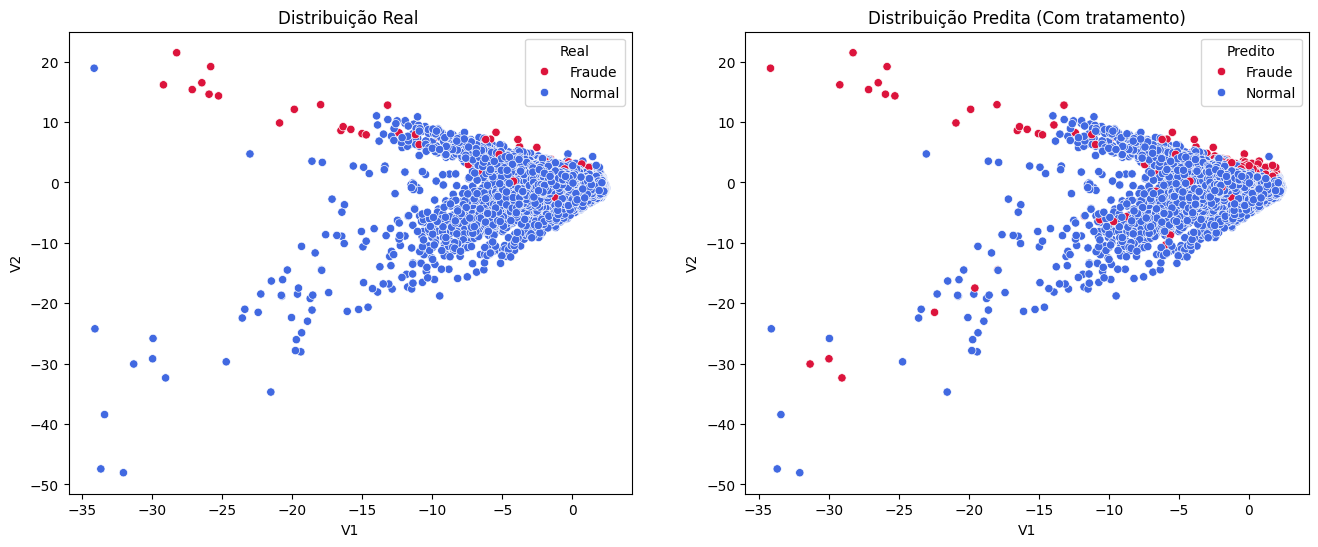

In [90]:
# Plotagem do modelo treinado com técnica de pré-processamento smote
import pandas as pd

cores_map = {'Normal': 'royalblue', 'Fraude': 'crimson'}

df_plot = pd.DataFrame(X_test, columns=['V1', 'V2'])
df_plot['Real'] = y_test
df_plot['Predito'] = y_pred_smote

df_plot['Real'] = df_plot['Real'].replace(to_replace=[0, 1], value=['Normal', 'Fraude'])
df_plot['Predito'] = df_plot['Predito'].replace(to_replace=[0, 1], value=['Normal', 'Fraude'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot dos Valores Reais
sns.scatterplot(data=df_plot, x='V1', y='V2', hue='Real', ax=axes[0], palette=cores_map)
axes[0].set_title('Distribuição Real ')

# Plot dos Valores Preditos
sns.scatterplot(data=df_plot, x='V1', y='V2', hue='Predito', ax=axes[1], palette=cores_map)
axes[1].set_title('Distribuição Predita (Com tratamento)')

plt.savefig(fname='com_tratamento_creditcard.png')

plt.show()

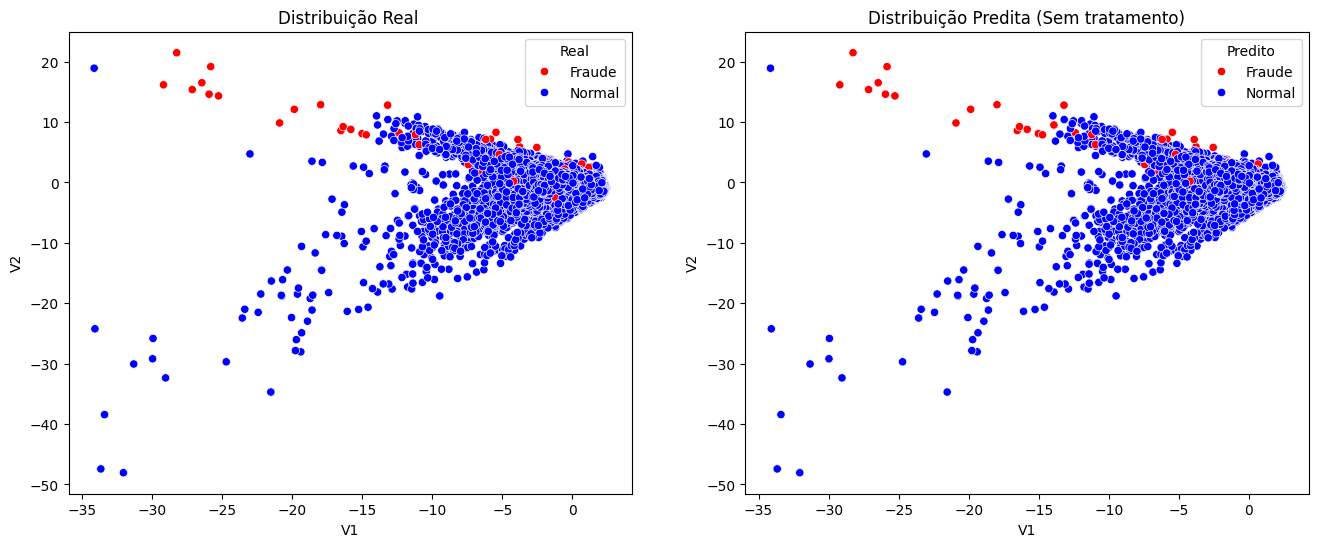

In [89]:
import pandas as pd

cores_map = {'Normal': 'blue', 'Fraude': 'red'}

df2_plot = pd.DataFrame(X_test, columns=['V1', 'V2'])
df2_plot['Real'] = y_test
df2_plot['Predito'] = y_pred_raw

df2_plot['Real'] = df2_plot['Real'].replace(to_replace=[0, 1], value=['Normal', 'Fraude'])
df2_plot['Predito'] = df2_plot['Predito'].replace(to_replace=[0, 1], value=['Normal', 'Fraude'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot dos Valores Reais
sns.scatterplot(data=df2_plot, x='V1', y='V2', hue='Real', ax=axes[0], palette=cores_map)
axes[0].set_title('Distribuição Real ')

# Plot dos Valores Preditos
sns.scatterplot(data=df2_plot, x='V1', y='V2', hue='Predito', ax=axes[1], palette=cores_map)
axes[1].set_title('Distribuição Predita (Sem tratamento)')

plt.savefig(fname='sem_tratamento_creditcard.png')

plt.show()